In [1]:
import plot

In [20]:
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
from graph_data import GraphDataset
import energyflow as ef
import torch
import torch.nn as nn
import os.path as osp
from torch_geometric.data import Data, DataLoader, DataListLoader, Batch
from torch.utils.data import random_split
from scipy.stats import iqr

In [3]:
gdata = GraphDataset(root='/energyflowvol/datasets/', n_jets=100, n_events_merge=1)

In [30]:
_, data = random_split(gdata, [len(gdata)-100, 100])

In [5]:
len(data)

100

In [7]:
x_input = plot.get_x_input(data)
x_input

((tensor([0.0033, 0.0018, 0.0017,  ..., 0.0316, 0.2482, 0.3008]), 'pt'),
 (tensor([ 0.3460,  0.0815,  0.3492,  ..., -0.1002, -0.0969, -0.0945]), 'eta'),
 (tensor([0.1776, 0.3543, 0.0116,  ..., 0.0361, 0.0331, 0.0335]), 'phi'))

In [8]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'

In [39]:
def get_y_output(gdata):
    y = []
    for d in gdata:
        y.append(d[0].y[0])
    y = torch.cat(y)
    return y
y = get_y_output(data)

PT
min: 0.00021260447101667523
max: 0.8064922094345093
avg: 0.022946305572986603
med: 0.005346550606191158
iqr: 0.014071182813495398

ETA
min: -0.39298611879348755
max: 0.39617377519607544
avg: 0.004044757690280676
med: 0.0006116789299994707
iqr: 0.11352299526333809

PHI
min: -0.39344534277915955
max: 0.3982384204864502
avg: -0.007440187036991119
med: 0.00019979359058197588
iqr: 0.1261487491428852

EMD
min: 0.0
max: 14.371859550476074
avg: 5.794693470001221
med: 5.090531826019287
iqr: 3.9118064045906067


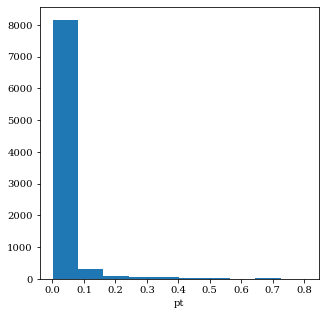

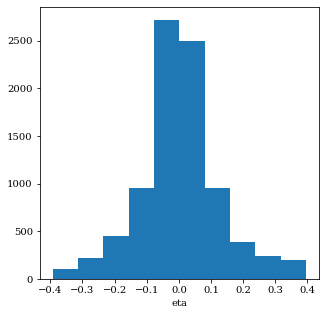

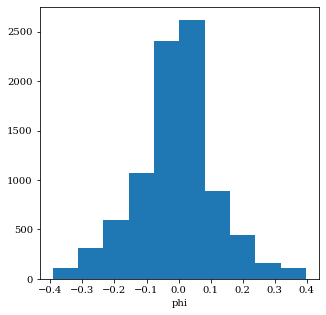

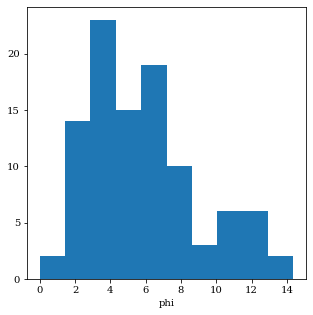

In [40]:
feat=x_input[0][0]
len(feat)
fig, ax = plt.subplots(figsize =(5, 5)) 
plt.hist(feat.numpy())
ax.set_xlabel('pt')
print(f'PT\nmin: {min(feat)}\nmax: {max(feat)}\navg: {torch.mean(feat)}\nmed: {torch.median(feat)}\niqr: {iqr(feat)}')

feat=x_input[1][0]
len(feat)
fig, ax = plt.subplots(figsize =(5, 5)) 
plt.hist(feat.numpy())
ax.set_xlabel('eta')
print(f'\nETA\nmin: {min(feat)}\nmax: {max(feat)}\navg: {torch.mean(feat)}\nmed: {torch.median(feat)}\niqr: {iqr(feat)}')

feat=x_input[2][0]
len(feat)
fig, ax = plt.subplots(figsize =(5, 5)) 
plt.hist(feat.numpy())
ax.set_xlabel('phi')
print(f'\nPHI\nmin: {min(feat)}\nmax: {max(feat)}\navg: {torch.mean(feat)}\nmed: {torch.median(feat)}\niqr: {iqr(feat)}')

feat=y
len(feat)
fig, ax = plt.subplots(figsize =(5, 5)) 
plt.hist(feat.numpy())
ax.set_xlabel('emd')
print(f'\nEMD\nmin: {min(feat)}\nmax: {max(feat)}\navg: {torch.mean(feat)}\nmed: {torch.median(feat)}\niqr: {iqr(feat)}')

# Note to self: EMD values are wrong (some factor larger than what they should be)